In [1]:
from google.colab import files
uploaded = files.upload()

Saving heart.txt to heart.txt


In [4]:
import pandas as pd

# Load dataset
df = pd.read_csv('heart.txt')  # upload your heart.txt file
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
# Check for nulls
print(df.isnull().sum())

# Separate features and target
X = df.drop('target', axis=1)
y = df['target']

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [6]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)

# Predict
y_pred = dtree.predict(X_test)

# Accuracy
from sklearn.metrics import accuracy_score
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred))

Decision Tree Accuracy: 0.7540983606557377


In [7]:
!apt install graphviz
!pip install graphviz

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


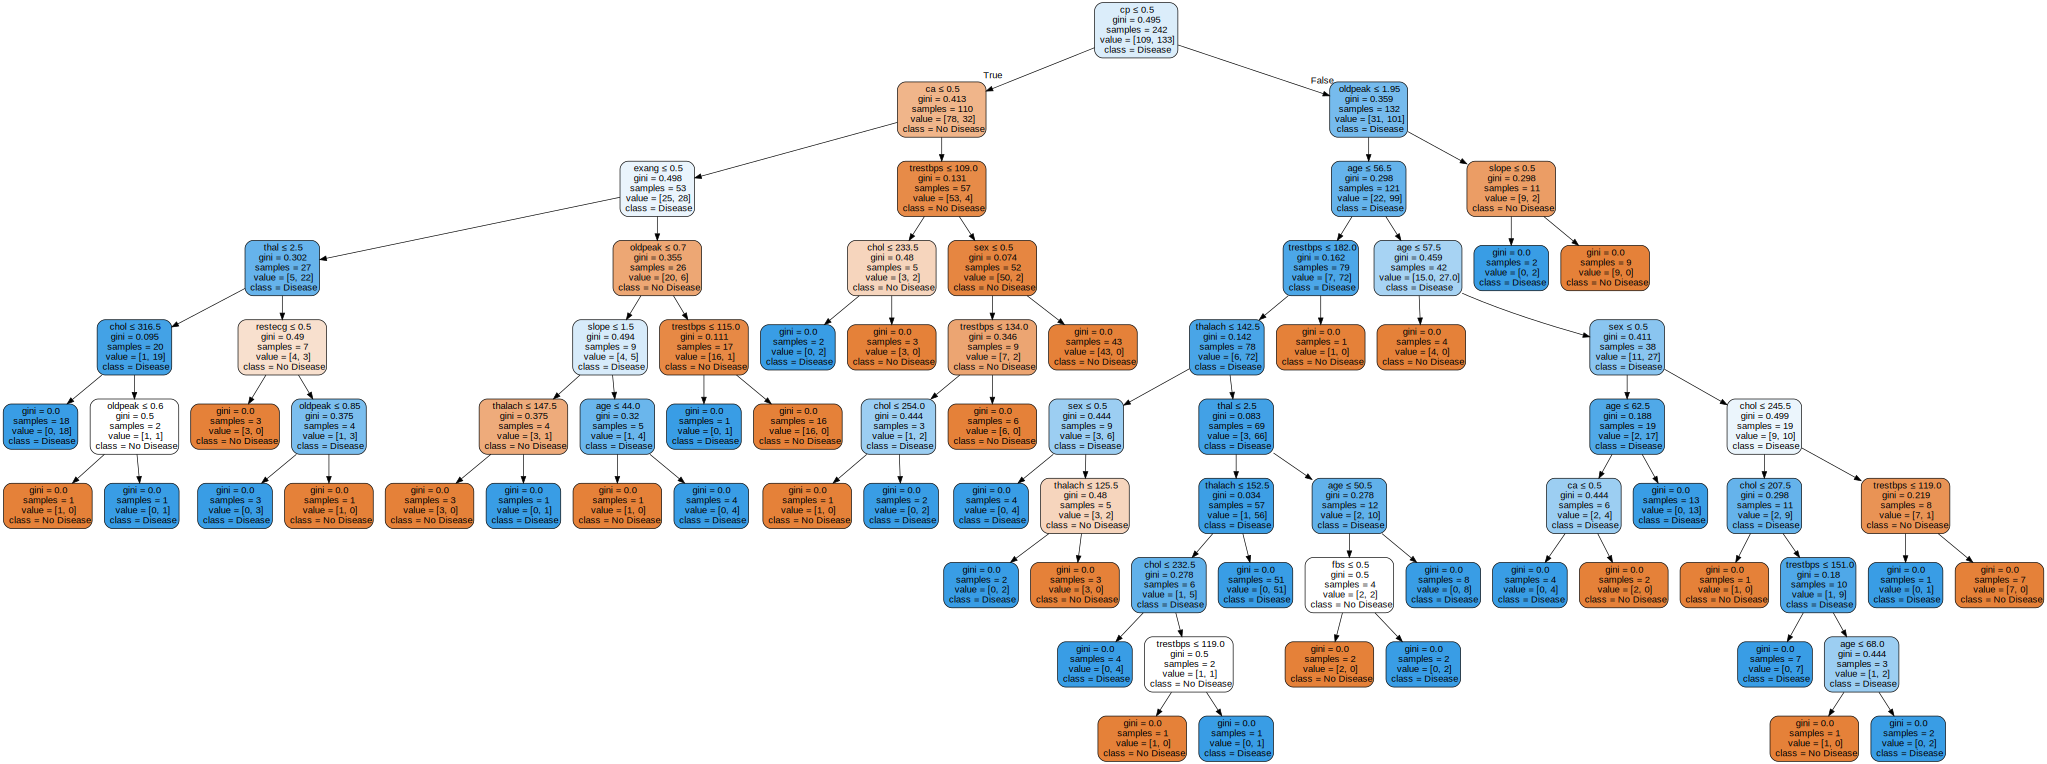

In [8]:
from sklearn.tree import export_graphviz
from graphviz import Source

# Export as dot file and visualize
dot_data = export_graphviz(dtree, out_file=None, feature_names=X.columns,
                           class_names=['No Disease', 'Disease'],
                           filled=True, rounded=True, special_characters=True)
graph = Source(dot_data)
graph.render("decision_tree")  # saves tree
graph  # shows tree

In [9]:
# Limit tree depth
dtree_pruned = DecisionTreeClassifier(max_depth=3, random_state=42)
dtree_pruned.fit(X_train, y_train)

# Evaluate again
y_pred_pruned = dtree_pruned.predict(X_test)
print("Pruned Tree Accuracy:", accuracy_score(y_test, y_pred_pruned))

Pruned Tree Accuracy: 0.819672131147541


In [10]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

Random Forest Accuracy: 0.8360655737704918


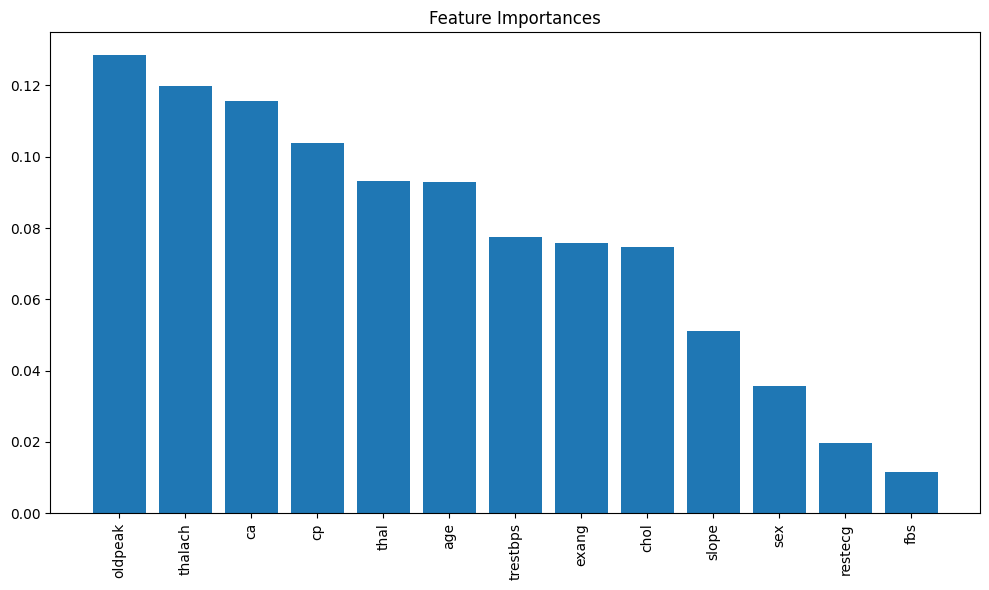

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Plot feature importances
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

plt.figure(figsize=(10,6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.tight_layout()
plt.show()

In [12]:
from sklearn.model_selection import cross_val_score

# Evaluate with 5-fold CV
cv_scores = cross_val_score(rf, X, y, cv=5)
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross-Validation Accuracy Scores: [0.81967213 0.8852459  0.83606557 0.85       0.8       ]
Mean CV Accuracy: 0.8381967213114756
